In [7]:
#We will import all the basic libraries required for the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  
import pydot 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from six import StringIO

# Let us read the data.
df = pd.read_csv("kyphosis.csv")
df.head()


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
# The dataset is normal in nature and further preprocessing of the attributes is not required. So, we will directly jump 
##into splitting the data for training and testing.

X = df.drop("Kyphosis",axis=1)
y = df["Kyphosis"]

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30)

In [9]:
#feature scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
# Now that we have fitted the training data to a Decision Tree Classifier, it is time to predict the output of the test data.

y_pred = dtree.predict(X_test)
accuracy_score(y_test,y_pred)*100

76.0

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.80      0.89      0.84        18
     present       0.60      0.43      0.50         7

    accuracy                           0.76        25
   macro avg       0.70      0.66      0.67        25
weighted avg       0.74      0.76      0.75        25



In [13]:
# From the evaluation, we can see that the model is performing good but the present label gives a 40% precision and recall 
# what needs to be improved. Let us see the confusion matrix for the misclassification.

print(confusion_matrix(y_test,y_pred))

[[16  2]
 [ 4  3]]


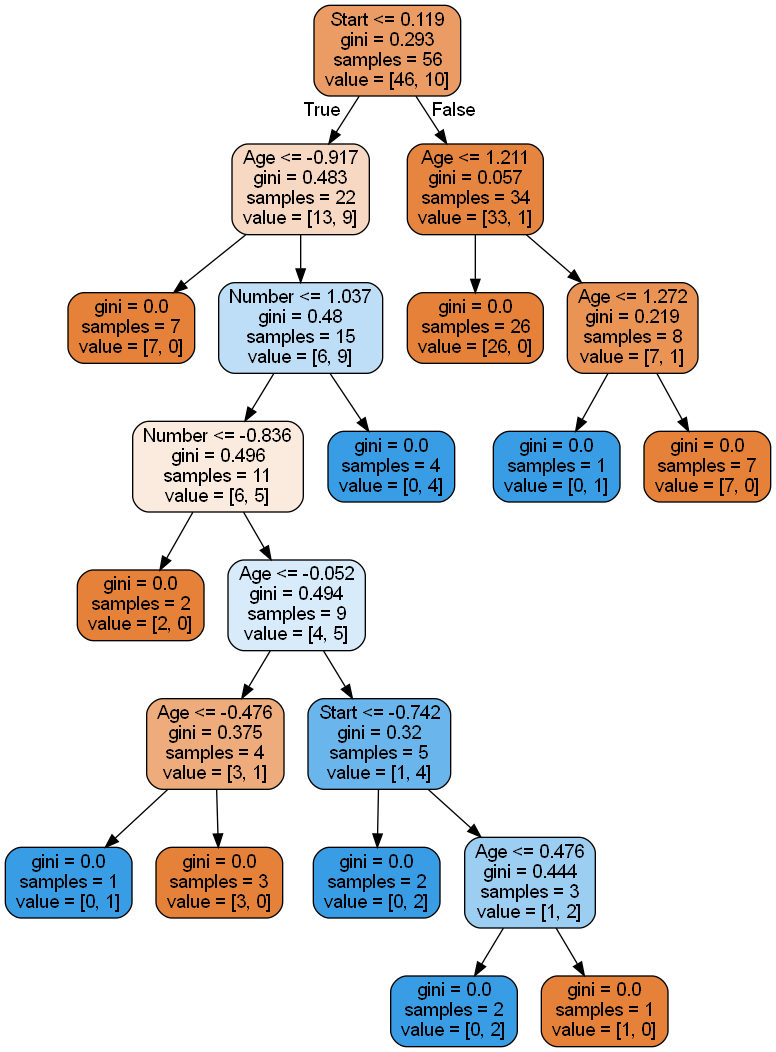

In [14]:
features = list(df.columns[1:])

dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png())  